


# 625 Spring 2023 : Homework 4, Coding

There are five sections below, corresponding to three coding assignments. Implement and test (note that Problem 11 is a no-credit exercise). 


# Problem 6 : Infogain



In [20]:
'''
PROBLEM 6

- implement the functions in this code cell for problem 6.

'''

import math
import numpy as np

#--------------------------
# my_log function: implement this and use it in entropy() 
#--------------------------
def my_log(val):
  '''
  implement this
  '''

  # must take care of the val=0 case.
  # - right now it will cause an error when my_log(0) is called. 
  return math.log2(val) if val else 0


#--------------------------
# entropy function: implement this and use it in infogain() 
#--------------------------
def entropy(pos_neg):
  '''
  implement this

  input:
  pos_neg is a list  [n, m], where
  n is the number of positive samples, and
  m is the number of negative samples
 
  returns:
  entropy value

  '''

  pos = pos_neg[0]
  neg = pos_neg[1]
  prob_pos = pos/(pos+neg)
  prob_neg = 1-prob_pos

  # print('entropy()')
  # print(' prob_pos = '+str(prob_pos))
  return -prob_pos*my_log(prob_pos) - prob_neg*my_log(prob_neg)
  # compute entropy 
  # ...
  # ...
  # return ....

#--------------------------
# infogain function: define this and test
#--------------------------
def infogain (before, after):
  '''
  implement this

  input:
    before: [n, m], for pos# and neg#
    after: [[n1, m1], [n2, m2], [n3, m3], ... ], 
      for pos# and neg# for the different splits. 
    * example: 
      before = [6,6]
      after  = [ [0,2], [4,0], [2,4] ] 

  returns: infogain value
  '''

  print('infogain()')

  # 1. entropy before split
  entropy_before_split=entropy(before)
  print(f'Entropy before split={entropy_before_split}')
  
  # 2. entropy after split

  total=sum(before)
  SUM = sum((sum(split) / total) * entropy(split) for split in after)

  print(f'Entropy after split={SUM}')

  # 3. compute infogaion from 1 and 2 above
  # gain = ....

  gain=entropy(before)-SUM

  # 4. return
  # return gain
  print(f'information gain ={gain}')
  return gain  

#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print(entropy([2,5]))

#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('\n\n')
print(infogain(pre, post))

1.0
0.863120568566631



infogain()
Entropy before split=1.0
Entropy after split=0.4591479170272448
information gain =0.5408520829727552
0.5408520829727552


In [21]:
# Add your test code here, for the homework questions
def calculate_infogain(label, pre, post):
    print(label)
    print("Pre:", pre)
    print("Post:", post)
    infogain(pre, post)
    # print("Information gain:", infogain(pre, post))
    print("\n")

pre_commute = [4,4]
post_commute = [[2,2], [2,2]]
calculate_infogain("Commute", pre_commute, post_commute)

pre_job_type = [4,4]
post_job_type = [[4,1], [0,3]]
calculate_infogain("Job Type", pre_job_type, post_job_type)

pre_location = [4,4]
post_location = [[1,3], [3,1]]
calculate_infogain("Location", pre_location, post_location)

pre_stock_option = [4,4]
post_stock_option = [[2,1], [2,3]]
calculate_infogain("Stock Option", pre_stock_option, post_stock_option)



Commute
Pre: [4, 4]
Post: [[2, 2], [2, 2]]
infogain()
Entropy before split=1.0
Entropy after split=1.0
information gain =0.0


Job Type
Pre: [4, 4]
Post: [[4, 1], [0, 3]]
infogain()
Entropy before split=1.0
Entropy after split=0.4512050593046014
information gain =0.5487949406953986


Location
Pre: [4, 4]
Post: [[1, 3], [3, 1]]
infogain()
Entropy before split=1.0
Entropy after split=0.8112781244591328
information gain =0.18872187554086717


Stock Option
Pre: [4, 4]
Post: [[2, 1], [2, 3]]
infogain()
Entropy before split=1.0
Entropy after split=0.9512050593046015
information gain =0.04879494069539847




In [22]:
# Add your test code here, for the homework questions
pre_fri = [6,6]
post_fri = [[2,3], [4,3]]
calculate_infogain("Fri", pre_fri, post_fri)

pre_hun = [6,6]
post_hun = [[5,2], [1,4]]
calculate_infogain("Hun", pre_hun, post_hun)

pre_pat = [6,6]
post_pat = [[4,0], [2,4], [0,2]]
calculate_infogain("Pat", pre_pat, post_pat)

pre_type = [6,6]
post_type = [[1,1], [2,2], [2,2], [1,1]]
calculate_infogain("Type", pre_type, post_type)


Fri
Pre: [6, 6]
Post: [[2, 3], [4, 3]]
infogain()
Entropy before split=1.0
Entropy after split=0.979279160376092
information gain =0.020720839623908027


Hun
Pre: [6, 6]
Post: [[5, 2], [1, 4]]
infogain()
Entropy before split=1.0
Entropy after split=0.8042903712002691
information gain =0.19570962879973086


Pat
Pre: [6, 6]
Post: [[4, 0], [2, 4], [0, 2]]
infogain()
Entropy before split=1.0
Entropy after split=0.4591479170272448
information gain =0.5408520829727552


Type
Pre: [6, 6]
Post: [[1, 1], [2, 2], [2, 2], [1, 1]]
infogain()
Entropy before split=1.0
Entropy after split=0.9999999999999999
information gain =1.1102230246251565e-16




# Problem 7 : Decision Tree


accuracy on table 1 dataset: 100.00%


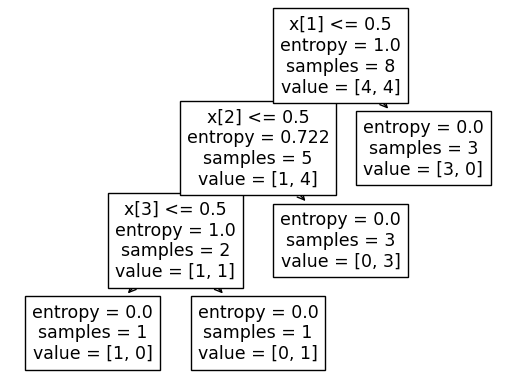

In [23]:
# Testing scikit-learn's decision tree implementation. 
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np 

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this 
#
# Column order: Commute, JobType, Location, StockOption
# Values:
#    Commute:     1hr=0, 2hr=1
#    JobType:     researech=0, development=1
#    Location:    westcoast=0, eastcoast=1
#    StockOption: yes=1, no=0 
# Target:         N=0, Y=1
X = [[1,0,0,1], 
     [0,1,1,0],
     [0,0,1,1], 
     [1,0,1,0],
     [0,1,0,1],
     [0,0,1,0],
     [1,1,0,0],
     [1,0,0,0]]

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this 

y = [1, 
     0, 
     1, 
     1,
     0,
     1,
     0,
     0]
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b]. 
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.   
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in), 
#       so, for the homework problem, X[0] is Commute. X[1] is JobType, etc.

tree.plot_tree(clf)

# Check if the tree gives the correct answer for the mock dataset above. 
predict_y = clf.predict(X)
correct = sum([1 for i in range(len(y)) if y[i] == predict_y[i]])
accuracy = (correct / len(y)) * 100
print("accuracy on table 1 dataset: {:.2f}%".format(accuracy))


In [24]:
#Test three novel inputs 
X=[[1,0,0,0],
   [1,0,0,1],
   [1,0,1,0]]
print("Predictions",end="")
print(clf.predict(X))


Predictions[0 1 1]


# Problem 8 : Perceptron



number of epochs = 4
average error = 0.0


Testing plot_decision_boundary
[0.09990444 0.09177291 0.028507  ]


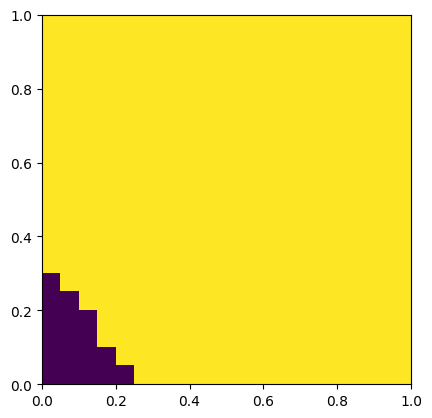

In [25]:
'''
Implement perceptron in this code cell : implement the perceptron() function 

Assumptions: 2 input, 1 output perceptron. 
  Note: 1 bias unit should also be added to the input vector  (fixed value of 1.0).
        This is already done in the skeleton code. 
'''

import matplotlib.pyplot as plt
import random

# example data: AND 
# -input  : [x,y] values
# -target : target values 
'''
  implement this: 
     add more samples, for OR, XOR, etc. 
'''
input  = np.array(
          [[0,0], 
          [0,1], 
          [1,0], 
          [1,1]])
target = np.array([
          0, 
          1, 
          1, 
          1])

BIAS = -1.0 

#-----------------------------
# plot decision boundary function
#-----------------------------
def plot_decision_boundary(W):
  '''
  plot the decision boundary for weight vector W
  - fully functional 
  ''' 

  x = np.arange(0.0, 1.0, 0.05)
  y = np.arange(1.0, 0.0, -0.05)

  xx, yy = np.meshgrid(x, y)

  output = W[0]*xx + W[1]*yy + W[2]*BIAS 

  fig, ax = plt.subplots(1,1)
  
  ax.imshow(output>=0.0, extent=[0,1,0,1]) 

#-----------------------------
# perceptron function: implement this
#-----------------------------
def perceptron(inp, tgt, alpha=0.01, err_target=0.001):
  '''
  implement this 
  
  input:
    inp : input vector array
    tgt : target output array
    alpha : learning rate, default = 0.01
    err_target : target error below which to terminate 

  output: print out #epochs, error, and plot the decision boundary

  returns: Weight vector
  '''

  # compute some common sizes
  num_dat = len(tgt)
  inp_dim = len(inp[0])+1        # "+1" to add bias unit

  # add bias to input vectors
  inp = np.append(inp, BIAS*np.ones([num_dat,1]), axis=1)

  # initialize weight vector : -0.5 ~ 0.5 
  W = (np.random.rand(inp_dim)-0.5)
  
  n = 0
  error = math.inf
  while error > err_target:
  
    #--------------
    # epoch
    #--------------

    # randomize input ordering
    order = np.arange(num_dat)
    np.random.shuffle(order)

    # 1. go over each input

    total_error = 0.0

    for i in order:

      # print("Input (with bias at the end)=", end='')
      # print(inp[i], end=', Target=')
      # print(tgt[i])

      # 1.1. activate output unit
      output=np.sum(inp[i]*W)
      output =1 if output>0 else 0
      

      # 1.2. compute error 
      
      error=tgt[i]-output
      
      # 1.3. adjust weight, based on the error
      # W=W+alpha*inp[i]*error 
      
      W=W+alpha*inp[i]*error 

      # 1.4. keep sum of total_error during this epoch 
      # total_error = total_error + absolute value of error from 1.2 
      total_error=total_error+abs(error)
    # 2. compute error for the epoch as the mean error from the current epoch 
    # error = total_error / number of samples 
    error = total_error / num_dat

    # increment epoch count
    n = n + 1 

    if n==30:
      break

    # forcefully quit, for now
    # error = 0.00001

  # Done with training 
  print('number of epochs = '+str(n))
  print('average error = '+str(error))



  # return weight vector
  return W 

#-----------------------------
# test perceptron
#-----------------------------
W = perceptron(input, target, 0.1, 0.001)

#-----------------------------
# test decision boundary plot: white = 1, black = 0
# - Note: if you get totally white of totally black, try
#     rerunnning (sometimes more than 10 times) to get a non-trivial result.
#-----------------------------
print('\n\nTesting plot_decision_boundary')
print(W)
plot_decision_boundary(W)



Testing plot decision boundary for AND Experiment 1
number of epochs = 4
average error = 0.0
W=[0.05426131 0.09445234 0.14169208]
--------------------

Testing plot decision boundary for AND Experiment 2
number of epochs = 8
average error = 0.0
W=[0.18579208 0.18688351 0.28277768]
--------------------

Testing plot decision boundary for AND Experiment 3
number of epochs = 14
average error = 0.0
W=[0.18603194 0.23120762 0.32833918]
--------------------

Testing plot decision boundary for OR Experiment 1
number of epochs = 8
average error = 0.0
W=[0.11478084 0.07783717 0.05258108]
--------------------

Testing plot decision boundary for OR Experiment 2
number of epochs = 5
average error = 0.0
W=[0.1369622  0.0924744  0.01304679]
--------------------

Testing plot decision boundary for OR Experiment 3
number of epochs = 3
average error = 0.0
W=[0.13871631 0.2948102  0.04794272]
--------------------

Testing plot decision boundary for XOR Experiment 1
number of epochs = 30
average error =

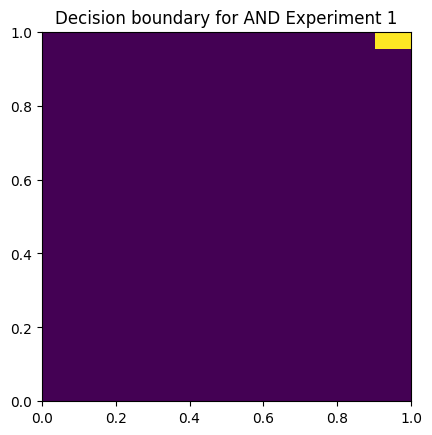

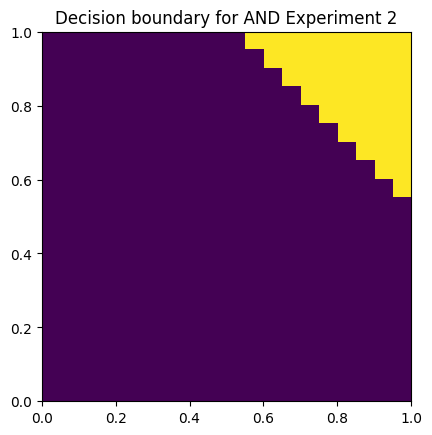

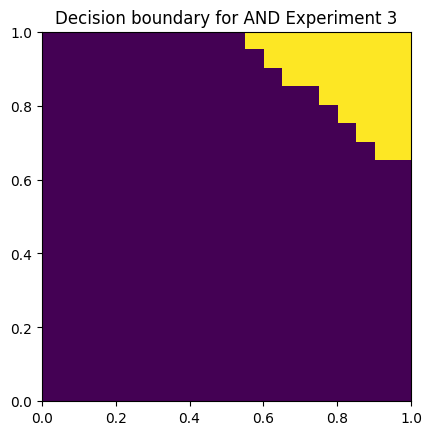

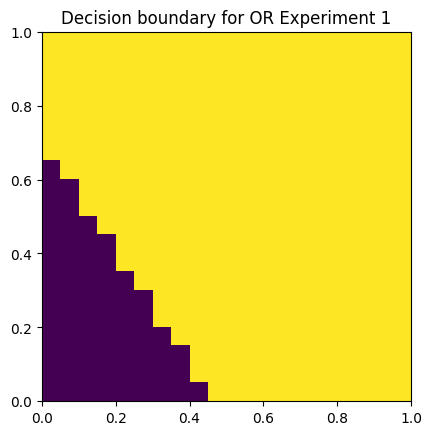

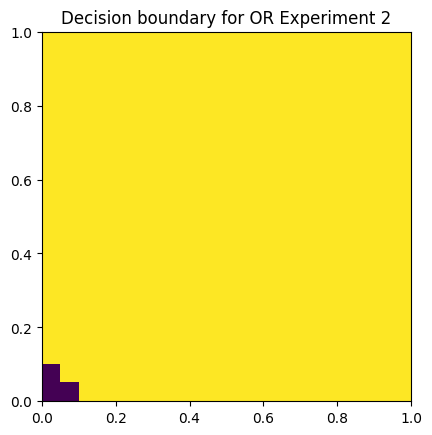

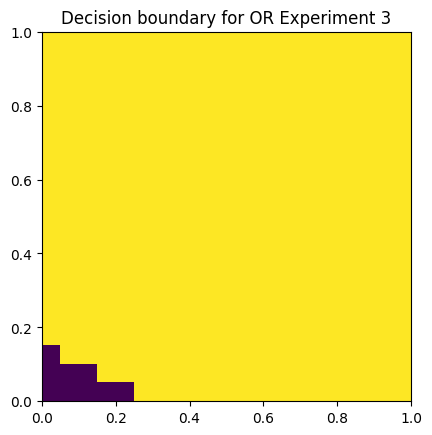

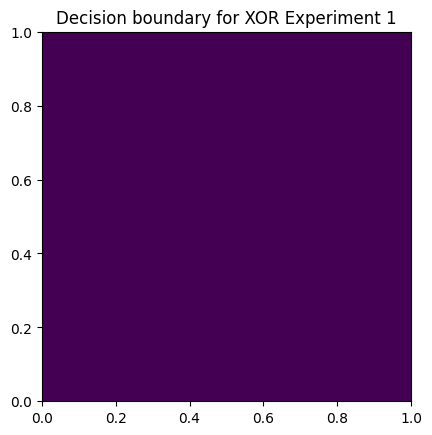

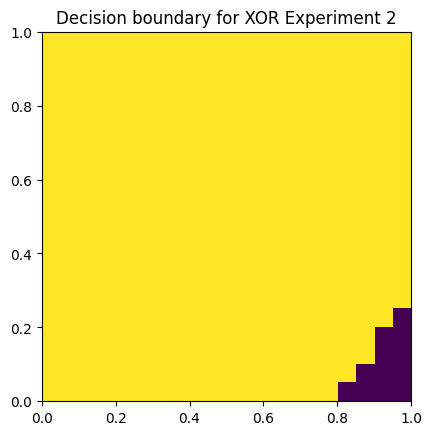

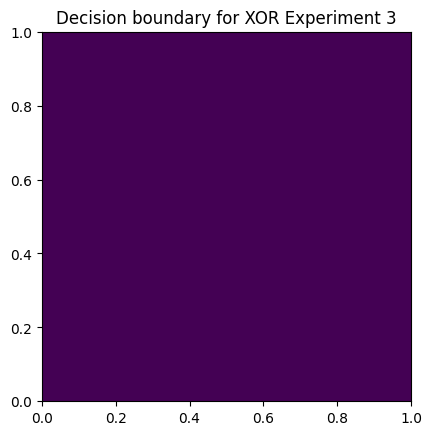

In [26]:
def test_perceptron(input, target, title):
  for i in range(num_experiments):
    print(f"\nTesting plot decision boundary for {title} Experiment {i+1}")
    W = perceptron(input, target, 0.1, 0)
    
    print(f'W={W}')
    plot_decision_boundary(W)
    plt.title(f"Decision boundary for {title} Experiment {i+1}")
    
    print('--------------------')

# Define the input and target arrays for the three logic gates
and_input = np.array([[0,0], [0,1], [1,0], [1,1]])
and_target = np.array([0, 0, 0, 1])

or_input = np.array([[0,0], [0,1], [1,0], [1,1]])
or_target = np.array([0, 1, 1, 1])

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_target = np.array([0, 1, 1, 0])

# Test the perceptron for the three logic gates using the common function
num_experiments = 3
test_perceptron(and_input, and_target, "AND")
test_perceptron(or_input, or_target, "OR")
test_perceptron(xor_input, xor_target, "XOR")


# Problem 11: Gradient Descent Exercise (no credit)





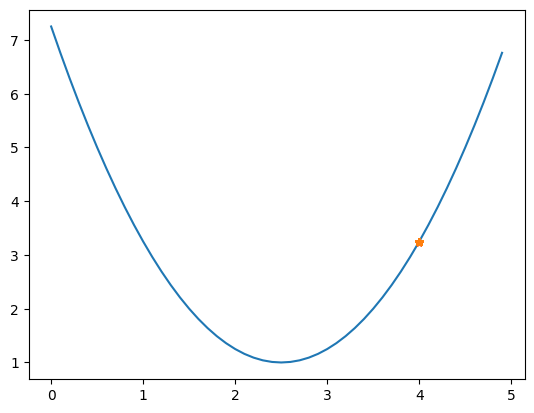

In [27]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define function 
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return np.power(w-2.5,2) + 1      # note: np.power() can take scalar or vector as argument.

# 2. define derivative function 
def dEdw(w):
  '''
  implement this
  '''
  return 2*(w-2.5)

# 3. gradient descent 

w = 4     # initial value
alpha = 0.8   # learning rate  ; try eta=0.8 and eta=0.001

n = 100 

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

for i in range(n):
  ''' 
  implement this for-loop
  '''
  w_t[i]=w
  Ew_t[i]=E(w)
  # implement this: gradient descent step
  # w = .....

# 4. plot E(w) and the gradient descent steps 

# Note: adjust the range below based on the function you're given in problem 10. 
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1. 
x = np.arange(0,5,0.1)  

plt.plot(x,E(x),"-",w_t,Ew_t,"*-")


# Problem 12 : CNN

In [28]:
# Prompt
# write code for “LeNet” (Yann LeCun’s original model), and train it on the MNIST hand-written data

import tensorflow as tf
from tensorflow.keras import layers

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to 28x28 and add a single color channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


for num_of_epoch in [2,5,10]:

  print('---------------------------------')
  print(f'The number of epoch is {num_of_epoch}')

  # Define the LeNet-5 model
  model = tf.keras.Sequential([
      layers.Conv2D(25, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(25, kernel_size=(5, 5), activation='relu'),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Dense(25, activation='relu'),
      layers.Flatten(),
      layers.Dense(84, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  # Compile the model with categorical cross-entropy loss and Adam optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  model.fit(train_images, tf.keras.utils.to_categorical(train_labels),
            batch_size=128, epochs=num_of_epoch, validation_data=(test_images, tf.keras.utils.to_categorical(test_labels)))

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(test_images, tf.keras.utils.to_categorical(test_labels))
  print('Test accuracy:', test_acc)
  print('---------------------------------')


---------------------------------
The number of epoch is 2
Epoch 1/2
469/469 [==============================] - 5s 6ms/step - loss: 0.2668 - accuracy: 0.9193 - val_loss: 0.0784 - val_accuracy: 0.9741
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9815
Test accuracy: 0.9815000295639038
---------------------------------
---------------------------------
The number of epoch is 5
Epoch 1/5
469/469 [==============================] - 5s 7ms/step - loss: 0.2663 - accuracy: 0.9244 - val_loss: 0.0739 - val_accuracy: 0.9767
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0671 - accuracy: 0.9797 - val_loss: 0.0461 - val_accuracy: 0.9863
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0368 - val_accuracy: 0.9867
Epoch 5/5


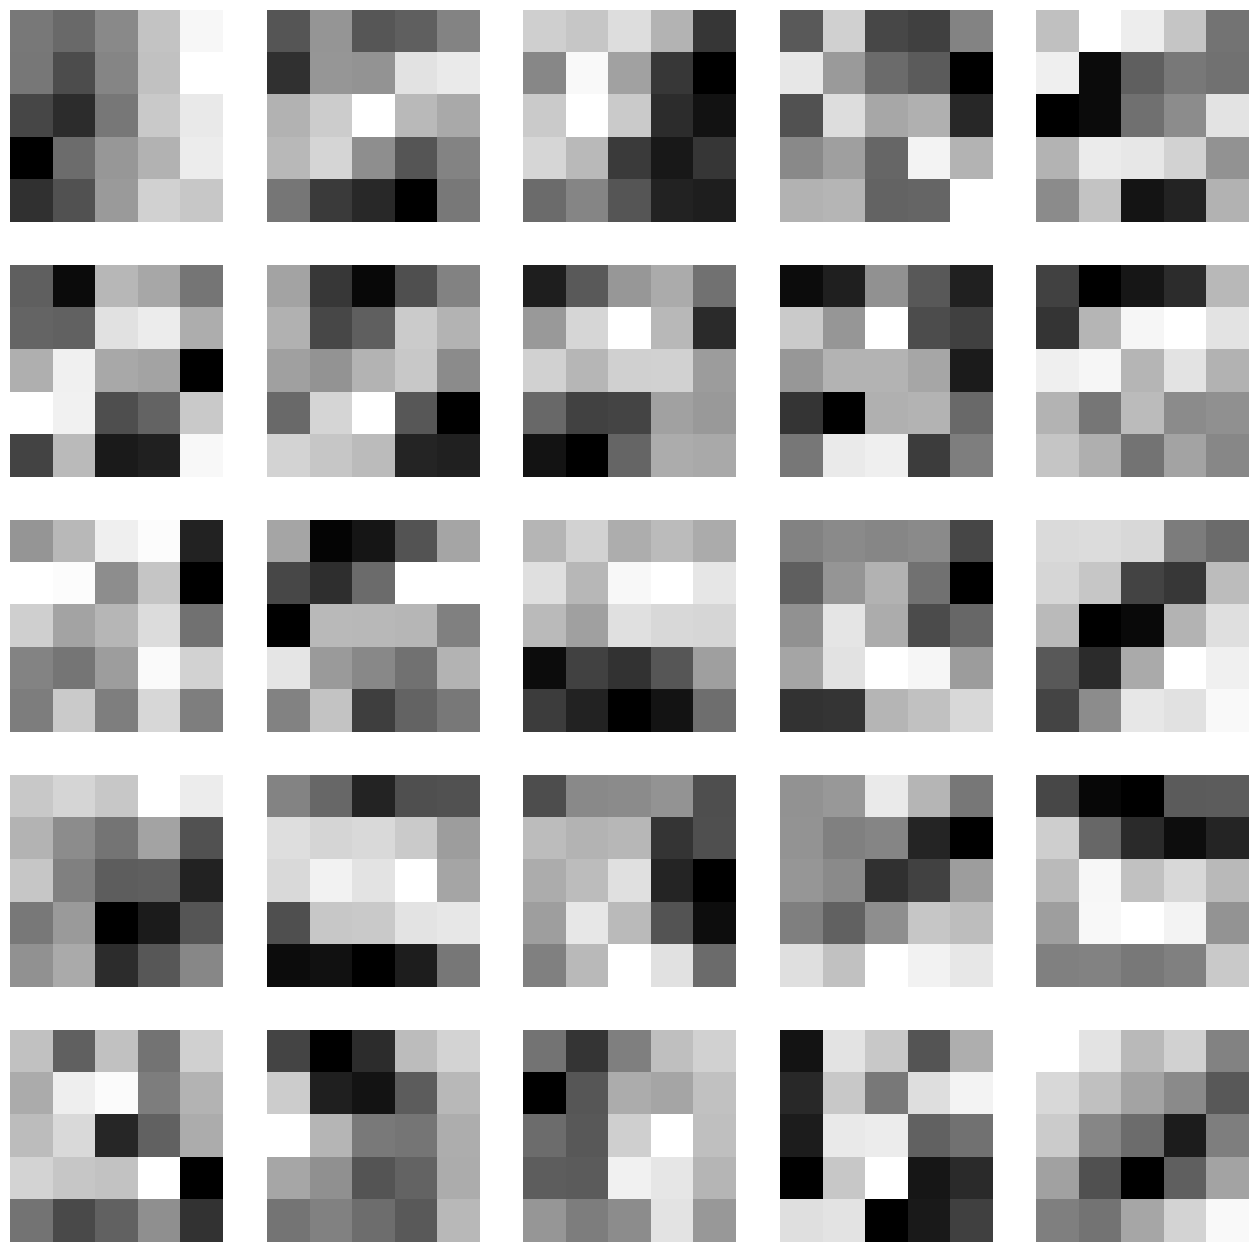

In [29]:
# plot the convolution kernels from the first conv layer (prompt)

import matplotlib.pyplot as plt
import numpy as np
# Get the weights from the convolutional layer
weights, biases = model.layers[0].get_weights()

# Normalize the weights to 0-1 range
w_min = np.min(weights)
w_max = np.max(weights)
weights = (weights - w_min) / (w_max - w_min)

# Plot the weights as grayscale images
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))
for i, ax in enumerate(axs.flatten()):
    
    ax.imshow(weights[:, :, :, i], cmap='gray')
    ax.axis('off')
plt.show()

1/1 [==============================] - 0s 62ms/step


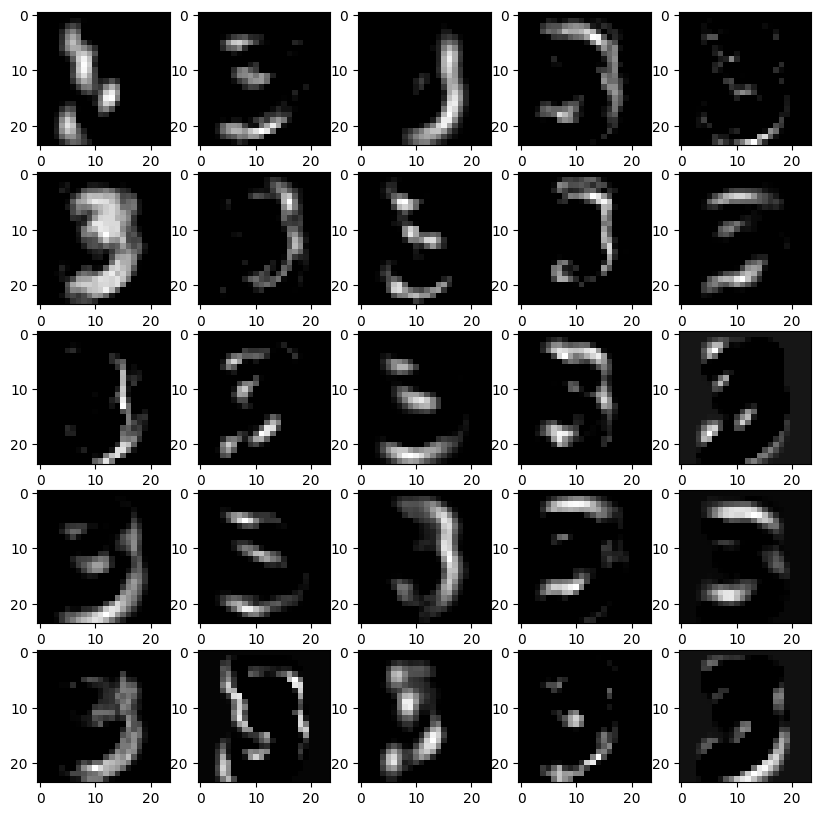

In [30]:
# plot the featuremaps from first conv layer (prompt)

# Choose an input image from the test set
input_img = test_images[np.where(test_labels==3)[0][10]]
# Define a new model that outputs the feature maps from the first convolutional layer
conv1_output = model.layers[0].output
conv1_feature_maps_model = tf.keras.Model(inputs=model.input, outputs=conv1_output)

# Compute the feature maps for the input image
conv1_feature_maps = conv1_feature_maps_model.predict(input_img[np.newaxis, ...])

# Show the feature maps
num_filters = conv1_feature_maps.shape[-1]
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(conv1_feature_maps[0, :, :, i], cmap='gray')
plt.show()